In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
filepath = 'C:\\Users\\kim\\Downloads\\sentiment labelled sentences\\sentiment labelled sentences\\amazon_cells_labelled.txt'
raw = pd.read_csv(filepath, delimiter='\t', header=None)
raw.columns=['comment','label']

In [23]:
raw[raw['label']==1]

,comment,label
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
13,Very good quality though,1
15,Highly recommend for any one who has a blue to...,1
17,So Far So Good!.,1
18,Works great!.,1


In [24]:
keywords = ['great', 'excellent', 'good', 'highly', 'sweetest', 'easy']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    #raw[str(key)]= raw.applymap(lambda x: 1 if str(key) in str(x).lower() else 0)
    comment = raw['comment'].str.lower()
    raw[str(key)] = np.where(comment.str.contains(str(key), case=False, na=False), '1', '0')
    

In [31]:
raw=raw.apply(lambda x: pd.to_numeric(x, errors='ignore'))

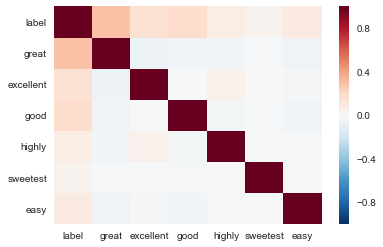

In [33]:
sns.heatmap(raw.corr())

In [36]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [43]:
data = raw[keywords]
data

,great,excellent,good,highly,sweetest,easy
0,0,0,0,0,0,0
1,0,1,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, raw['label'], test_size=0.4, random_state=0)

In [49]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, raw['label'])

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (y_test != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 135


<bound method ClassifierMixin.score of BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)>